In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import os

In [2]:

df = pd.read_csv('Circulatory.csv')
df.head()

,Unnamed: 0,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,Aspergillus unguis,...,ERMI Score (Group I - Group II),Circulatory_raynaudsphenomenon,Circulatory_loworreactivebloodpressure,Circulatory_cherryangiomas,Circulatory_easybruising/bleeding,Circulatory_spiderveins,Circulatory_irondeficiencyanemia,Circulatory_varicoseveins,Circulatory_irregularheartbeat,Circulatory_arteriovenousmalformation
0,0,-0.104428,-0.073751,-0.346139,-0.055444,-0.068028,-0.158983,-0.101535,-0.084850,-0.208728,...,-0.041578,1,1,0,0,0,0,0,0,0
1,1,-0.104428,-0.073751,-0.348158,-0.055444,-0.067795,-0.198118,-0.101535,-0.084850,-0.208728,...,-0.041614,0,0,1,1,0,0,0,0,0
2,2,-0.104428,-0.072315,-0.357242,0.052017,-0.068028,-0.176772,-0.101535,-0.078989,-0.208728,...,-0.041593,0,0,0,1,1,1,1,0,0
3,3,-0.104428,-0.073751,-0.360270,-0.055444,-0.068028,-0.198118,-0.101535,-0.084850,-0.208728,...,-0.041627,0,0,0,0,0,0,0,0,0
4,4,0.392251,-0.071357,-0.327971,-0.055444,-0.068028,-0.176772,-0.101535,-0.084850,-0.208728,...,-0.041596,1,0,1,0,1,0,0,0,0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [45]:
df.head(26)

,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,Aspergillus unguis,Aspergillus versicolor,...,ERMI Score (Group I - Group II),Circulatory_raynaudsphenomenon,Circulatory_loworreactivebloodpressure,Circulatory_cherryangiomas,Circulatory_easybruising/bleeding,Circulatory_spiderveins,Circulatory_irondeficiencyanemia,Circulatory_varicoseveins,Circulatory_irregularheartbeat,Circulatory_arteriovenousmalformation
0,-0.104428,-0.073751,-0.346139,-0.055444,-0.068028,-0.158983,-0.101535,-0.084850,-0.208728,-0.146772,...,-0.041578,1,1,0,0,0,0,0,0,0
1,-0.104428,-0.073751,-0.348158,-0.055444,-0.067795,-0.198118,-0.101535,-0.084850,-0.208728,-0.146772,...,-0.041614,0,0,1,1,0,0,0,0,0
2,-0.104428,-0.072315,-0.357242,0.052017,-0.068028,-0.176772,-0.101535,-0.078989,-0.208728,-0.068275,...,-0.041593,0,0,0,1,1,1,1,0,0
3,-0.104428,-0.073751,-0.360270,-0.055444,-0.068028,-0.198118,-0.101535,-0.084850,-0.208728,-0.145084,...,-0.041627,0,0,0,0,0,0,0,0,0
4,0.392251,-0.071357,-0.327971,-0.055444,-0.068028,-0.176772,-0.101535,-0.084850,-0.208728,-0.145084,...,-0.041596,1,0,1,0,1,0,0,0,0
5,-0.104428,0.074195,-0.356233,-0.055444,-0.067328,-0.198118,-0.076892,-0.084850,-0.208728,-0.114417,...,-0.041597,0,0,0,1,1,0,1,0,0
6,-0.104428,-0.073272,-0.349167,-0.055444,-0.068028,-0.187445,-0.101535,-0.084850,-0.208728,-0.138332,...,-0.041625,0,1,0,0,0,0,0,0,0
7,-0.104428,-0.065612,0.039430,-0.055444,-0.068028,-0.198118,-0.101535,-0.084850,-0.208728,-0.146772,...,-0.041573,0,0,0,0,1,0,0,0,0
8,-0.065625,-0.072315,-0.276495,-0.051311,-0.048057,-0.198118,-0.092294,-0.043824,0.045865,-0.120044,...,-0.041520,0,0,0,0,0,0,0,1,0
9,0.609548,-0.063696,4.491651,-0.027890,0.018201,-0.187445,-0.079973,-0.070784,1.233965,-0.140583,...,-0.041488,0,0,0,0,0,1,0,0,0


In [5]:
# function to remove asterisks from each cells
def remove_asterisks(s):
  if not isinstance(s, float) and '*' in s:
    return s.replace("*", "")
  return s

# Define the function to convert non-numeric values to 0
def convert_to_float_or_zero(value):
    try:
        return float(value)
    except ValueError:
        return 0

In [6]:
# Determine the index of the "ERMI Score (Group I - Group II)" column
mold_start_index = df.columns.get_loc("Aspergillus flavus/oryzae")
mold_end_index = df.columns.get_loc("ERMI Score (Group I - Group II)")
print(f" mold start index {mold_start_index} and end index {mold_end_index}")

 mold start index 0 and end index 36


In [7]:
for column_name in df.columns[mold_start_index:mold_end_index+1]:
    df[column_name] = df[column_name].apply(remove_asterisks)
    df[column_name] = df[column_name].apply(convert_to_float_or_zero)
    df[column_name] = df[column_name].fillna(0)

In [29]:
df.to_csv('Circulatory.csv')

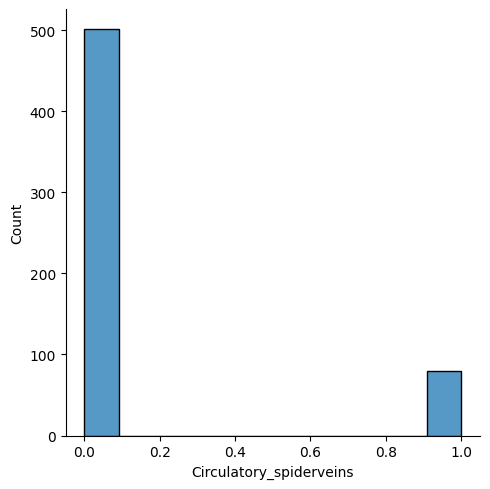

In [38]:
sns.displot(df['Circulatory_spiderveins']) 

MODELING RANDOM FOREST

In [11]:
df.dtypes

Aspergillus flavus/oryzae                 float64
Aspergillus fumigatus                     float64
Aspergillus niger                         float64
Aspergillus ochraceus                     float64
Aspergillus penicillioides                float64
Aspergillus restrictus*                   float64
Aspergillus sclerotiorum                  float64
Aspergillus sydowii                       float64
Aspergillus unguis                        float64
Aspergillus versicolor                    float64
Aureobasidium pullulans                   float64
Chaetomium globosum                       float64
Cladosporium sphaerospermum               float64
Eurotium (Asp.) amstelodami*              float64
Paecilomyces variotii                     float64
Penicillium brevicompactum                float64
Penicillium corylophilum                  float64
Penicillium crustosum*                    float64
Penicillium purpurogenum                  float64
Penicillium spinulosum*                   float64


In [12]:
column_info = pd.DataFrame({'Column Number': range(len(df.columns)), 'Column Name': df.columns})
print(column_info)

    Column Number                             Column Name
0               0               Aspergillus flavus/oryzae
1               1                   Aspergillus fumigatus
2               2                       Aspergillus niger
3               3                   Aspergillus ochraceus
4               4              Aspergillus penicillioides
5               5                 Aspergillus restrictus*
6               6                Aspergillus sclerotiorum
7               7                     Aspergillus sydowii
8               8                      Aspergillus unguis
9               9                  Aspergillus versicolor
10             10                 Aureobasidium pullulans
11             11                     Chaetomium globosum
12             12             Cladosporium sphaerospermum
13             13            Eurotium (Asp.) amstelodami*
14             14                   Paecilomyces variotii
15             15              Penicillium brevicompactum
16            

In [75]:
y_columns = ['Circulatory_spiderveins', 'Circulatory_raynaudsphenomenon','Circulatory_loworreactivebloodpressure','Circulatory_cherryangiomas','Circulatory_easybruising/bleeding']
df['Circulatory'] = df[y_columns].any(axis=1).astype(int)
X_columns = ['Circulatory','Circulatory_spiderveins', 'Circulatory_raynaudsphenomenon','Circulatory_loworreactivebloodpressure','Circulatory_cherryangiomas','Circulatory_easybruising/bleeding','Circulatory_irondeficiencyanemia','Circulatory_varicoseveins','Circulatory_irregularheartbeat','Circulatory_arteriovenousmalformation']


In [77]:
y= df['Circulatory']
X= df.drop(columns= X_columns, axis=1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import sklearn

In [90]:
print('Begin Random Forest Implementation...')

rf_20_model=RandomForestClassifier(criterion='entropy', n_estimators=20)
rf_20_model.fit(X_train, y_train)
rf_20_predictions=rf_20_model.predict_proba(X_test)[:,1].tolist()

rf_100_model=RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_100_model.fit(X_train, y_train)
rf_100_predictions=rf_100_model.predict_proba(X_test)[:,1].tolist()

print('End')

Begin Random Forest Implementation...


End


In [91]:
print('Computing ROC Curve...')

fpr_20, tpr_20, thresholds_20=roc_curve(y_test, rf_20_predictions)
fpr_100, tpr_100, thresholds_100=roc_curve(y_test, rf_100_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


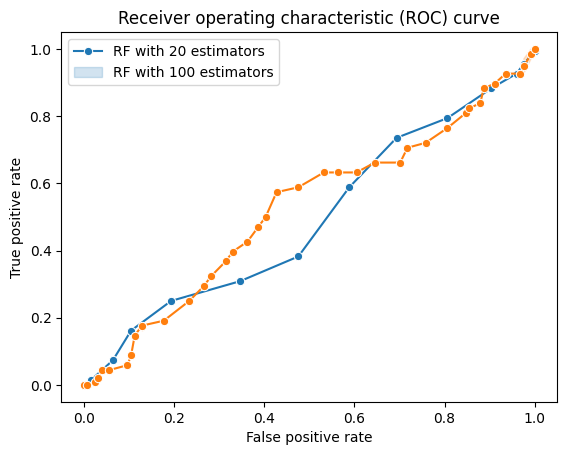

In [92]:
import matplotlib.pyplot as plt

print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [93]:
auc_20=auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

auc_100=auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))

AUC of the RF model with 20 estimators is 0.494
AUC of the RF model with 100 estimators is 0.523


In [97]:
df.head()

,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,Aspergillus unguis,Aspergillus versicolor,...,Circulatory_raynaudsphenomenon,Circulatory_loworreactivebloodpressure,Circulatory_cherryangiomas,Circulatory_easybruising/bleeding,Circulatory_spiderveins,Circulatory_irondeficiencyanemia,Circulatory_varicoseveins,Circulatory_irregularheartbeat,Circulatory_arteriovenousmalformation,Circulatory
0,-0.104428,-0.073751,-0.346139,-0.055444,-0.068028,-0.158983,-0.101535,-0.084850,-0.208728,-0.146772,...,1,1,0,0,0,0,0,0,0,1
1,-0.104428,-0.073751,-0.348158,-0.055444,-0.067795,-0.198118,-0.101535,-0.084850,-0.208728,-0.146772,...,0,0,1,1,0,0,0,0,0,1
2,-0.104428,-0.072315,-0.357242,0.052017,-0.068028,-0.176772,-0.101535,-0.078989,-0.208728,-0.068275,...,0,0,0,1,1,1,1,0,0,1
3,-0.104428,-0.073751,-0.360270,-0.055444,-0.068028,-0.198118,-0.101535,-0.084850,-0.208728,-0.145084,...,0,0,0,0,0,0,0,0,0,0
4,0.392251,-0.071357,-0.327971,-0.055444,-0.068028,-0.176772,-0.101535,-0.084850,-0.208728,-0.145084,...,1,0,1,0,1,0,0,0,0,1


In [103]:
input_data=(-0.0811457643559736,-0.0708782360350169,-0.3239337430354708,-0.0545256128485198,-0.0497370693463444,-0.0913864744855519,-0.089213931578953,-0.084850314227512,-0.208728269026151,-0.1467724641963087,0.1471832378574745,-0.1271167314979789,-0.1617573358480775,-0.2245972412402689,-0.0754662324832063,-0.0673324315363912,-0.2097632748881965,-0.1468162490144187,0.1635568906959894,-0.1189892346404996,1.544830965360156,-0.132710301871325,-0.0415813304422993,-0.1020841579047268,-0.2499874729787753,-0.1423031072292866,-0.1561302021952767,0.4819596743220989,-0.1837542647839166,0.2716539350880773,-0.1666528968239146,2.7570130107541733,0.0681996154645078,-0.2774502772744925,-0.1571541795399162,-0.144003238509169,-0.0415911207396698)
input_data_as_nparray = np.asarray(input_data) 
reshaped_input_data= input_data_as_nparray.reshape(1,-1)
prediction_of_input_rf = rf_100_model.predict(reshaped_input_data)

print(prediction_of_input_rf)


[0]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
